In [1]:
import nltk
import itertools as it
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
text = 'Existe um provérbio muito antigo, que fala que não importa quantos passos você deu para trás. ' \
       'Importante mesmo é quantos passos agora você vai dar pra frente. É preciso que se mude o jeito de agir.' \
       'Procurando sempre dar passados para frente.'

In [28]:
tokenized_sentences = sent_tokenize(text)
print(tokenized_sentences)

['Existe um provérbio muito antigo, que fala que não importa quantos passos você deu para trás.', 'Importante mesmo é quantos passos agora você vai dar pra frente.', 'É preciso que se mude o jeito de agir.Procurando sempre dar passados para frente.']


In [29]:
array_of_tokens = []
for item in tokenized_sentences:
    without_accentuation = item.replace('.', '')
    array_of_tokens.append(nltk.word_tokenize(without_accentuation))
print(array_of_tokens)

[['Existe', 'um', 'provérbio', 'muito', 'antigo', ',', 'que', 'fala', 'que', 'não', 'importa', 'quantos', 'passos', 'você', 'deu', 'para', 'trás'], ['Importante', 'mesmo', 'é', 'quantos', 'passos', 'agora', 'você', 'vai', 'dar', 'pra', 'frente'], ['É', 'preciso', 'que', 'se', 'mude', 'o', 'jeito', 'de', 'agirProcurando', 'sempre', 'dar', 'passados', 'para', 'frente']]


In [30]:
edgelist = [edge for phrase in array_of_tokens for edge in it.combinations(phrase, 2)]
print(edgelist)

[('Existe', 'um'), ('Existe', 'provérbio'), ('Existe', 'muito'), ('Existe', 'antigo'), ('Existe', ','), ('Existe', 'que'), ('Existe', 'fala'), ('Existe', 'que'), ('Existe', 'não'), ('Existe', 'importa'), ('Existe', 'quantos'), ('Existe', 'passos'), ('Existe', 'você'), ('Existe', 'deu'), ('Existe', 'para'), ('Existe', 'trás'), ('um', 'provérbio'), ('um', 'muito'), ('um', 'antigo'), ('um', ','), ('um', 'que'), ('um', 'fala'), ('um', 'que'), ('um', 'não'), ('um', 'importa'), ('um', 'quantos'), ('um', 'passos'), ('um', 'você'), ('um', 'deu'), ('um', 'para'), ('um', 'trás'), ('provérbio', 'muito'), ('provérbio', 'antigo'), ('provérbio', ','), ('provérbio', 'que'), ('provérbio', 'fala'), ('provérbio', 'que'), ('provérbio', 'não'), ('provérbio', 'importa'), ('provérbio', 'quantos'), ('provérbio', 'passos'), ('provérbio', 'você'), ('provérbio', 'deu'), ('provérbio', 'para'), ('provérbio', 'trás'), ('muito', 'antigo'), ('muito', ','), ('muito', 'que'), ('muito', 'fala'), ('muito', 'que'), ('mui

In [33]:
G = nx.Graph(edgelist)
index = nx.betweenness_centrality(G)
sorted_index = sorted(index.items(), key=lambda x:x[1], reverse=True)
for word, centr in sorted_index[:10]:
  print(word, centr)

que 0.12670454545454546
para 0.12670454545454546
dar 0.07556818181818181
frente 0.07556818181818181
quantos 0.054545454545454564
passos 0.054545454545454564
você 0.054545454545454564
Existe 0.0
um 0.0
provérbio 0.0


In [26]:
plt.rc('figure', figsize=(22, 7))
# G.remove_nodes_from([n for n in index if index[n] == .0])
node_size = [index[n]*10000 for n in G]

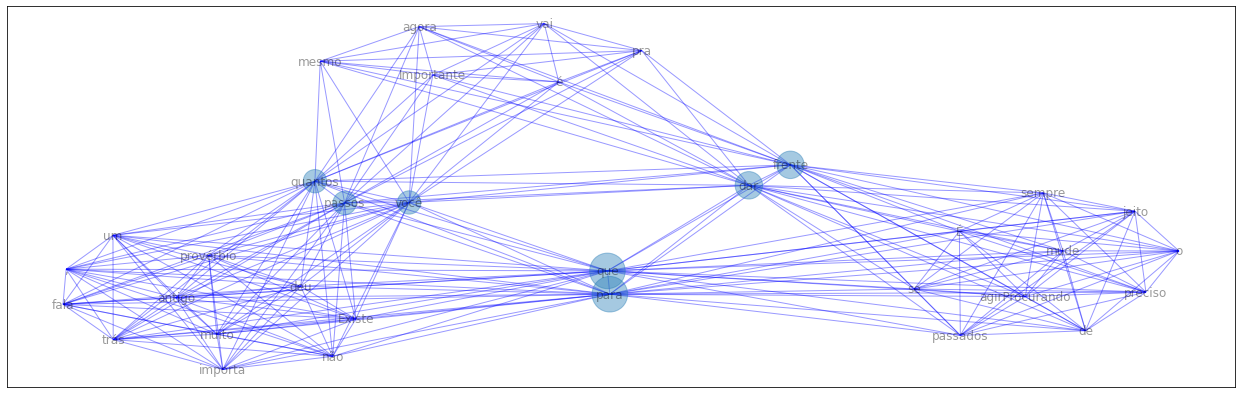

In [27]:
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='b', alpha=.4, linewidths=1)
plt.show()